Assignment 2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
#Import dataset
data= pd.read_csv("diabetes.csv")

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Pre-processing block

In [4]:
#Train, test and validation spilt
from sklearn.model_selection import train_test_split

data_set_values=np.array(data)
number_of_rows,number_of_cols=data.shape
train, test = train_test_split(data_set_values, test_size = 0.4,random_state=57)
test, validate = train_test_split(test, test_size = 0.5,random_state=3)

In [5]:
#Spilt all sets into input and output sets
train_x=train[:,:number_of_cols-1]
train_y=train[:,[number_of_cols-1]]

test_x=test[:,:number_of_cols-1]
test_y=test[:,[number_of_cols-1]]

validate_x=validate[:,:number_of_cols-1]
validate_y=validate[:,[number_of_cols-1]]

#perform normalization on the input data set
input_data= np.vstack((train_x,test_x,validate_x))
mean_data = np.mean(input_data, axis=0)
std_data = np.std(input_data, axis=0)
train_x = (train_x - mean_data)/std_data
test_x = (test_x - mean_data)/std_data
validate_x = (validate_x - mean_data)/std_data

In [ ]:
#End of Pre-processing block

In [ ]:
#Start of Logistic Regression - Part 1

In [20]:
#Logistic Regression - Model Definition
class logisticRegression:
    def __init__(self,total_iterations,learning_rate):
        self.learning_rate=learning_rate
        self.total_iterations=total_iterations
        self.bias=0
        
    #Activation function
    def sigmoidFunction(self,X): 
        return 1/(1+np.exp(-X))
#         return 1/(1+scipy.special.expit(-X))
    def relufunction(self,X):
        Z=np.max(0,X)
        assert(X.shape == Z.shape)
        return Z

    #Training function
    def train(self,input,Y): 

        rows,cols=input.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        costList=[]
        iterationList=[]
        for _ in range(self.total_iterations+1):
            # y= x * w + b
            output=np.dot(input,self.w)+self.bias
            
            #apply Activating function
            Z=self.sigmoidFunction(output)
            #calculating cost
            cost=(-1/self.m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))
            
            if _%1000==0:
#                 print("loss during ",_," iteration =",cost)
                iterationList.append(_)
                costList.append(cost)
            
            #Gradient Descent
            dw=(1/self.m)*np.dot(input.T,np.subtract(Z,Y))
            db=(1/self.m)*np.sum(np.subtract(Z,Y))
            
            #updating weights and bais (Learning Part)
            self.w = self.w-self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
        print(cost)
        plt.plot(iterationList, costList)
        plt.title("Cost Relation")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        return 

    #Prediction function
    def predict(self,input):
        output=np.dot(input,self.w)+self.bias
        Z=self.sigmoidFunction(output)
        # if output more than 0.5 then yes else no. (Binary Classification)
        prediction=[]
        for i in Z:
            if i>=0.5:
                prediction.append(1)
            else:
                prediction.append(0)
        return prediction

In [21]:
model=logisticRegression(total_iterations=10000,learning_rate=0.001)

0.5104049375439529


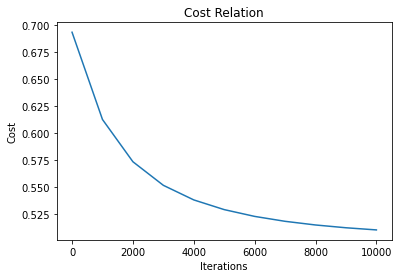

In [22]:
model.train(train_x,train_y)

In [ ]:
from sklearn.metrics import accuracy_score
test_prediction = model.predict(test_x)

In [ ]:
print("Accuracy = ", accuracy_score(test_y,test_prediction))

Accuracy =  0.8116883116883117


In [ ]:
#Calculating Metrics
class Metrics:

   def __init__(self,TP,FP,TN,FN):
      self.TP = TP
      self.FP = FP
      self.TN = TN
      self.FN = FN

   def PrecisionScore(TP)      





In [ ]:
def perf_measure(y_actual, y_hat):
   TP = 0
   FP = 0
   TN = 0
   FN = 0

   for i in range(len(y_hat)): 
      if y_actual[i]==y_hat[i]==1:
         TP += 1
      if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
         FP += 1
      if y_actual[i]==y_hat[i]==0:
         TN += 1
      if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
         FN += 1

   return(TP, FP, TN, FN)
#Precision Score = TP / (FP + TP)
def PrecisionScore(TP,FP,TN,FN):


In [ ]:
TP,FP,TN,FN = perf_measure(test_y,test_prediction)

(39, 13, 86, 16)
